### Курсовой проект для курса "Python для Data Science"

Материалы к проекту (файлы):
train.csv
test.csv

Задание:
Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

Целевая переменная:
Price

Метрика качества:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Требования к решению:
1. R2 > 0.6
2. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример SShirkin_solution.ipynb
3. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример SShirkin_predictions.csv 
Файл должен содержать два поля: Id, Price и в файле должна быть 5001 строка (шапка + 5000 предсказаний).

Сроки сдачи:
Cдать проект нужно в течение 72 часов после окончания последнего вебинара. Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества. Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

### Описание датасета:
* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* ***Price*** - цена квартиры

### Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Пути к файлам

In [3]:
PREPARED_TRAIN_DATASET_PATH = 'C:/Users/kosmki/Documents/Documents/My/Python_GeekBrains/4. NP Pandas/project/project_task/project_task/train.csv'
PREPARED_TEST_DATASET_PATH = 'C:/Users/kosmki/Documents/Documents/My/Python_GeekBrains/4. NP Pandas/project/project_task/project_task/test.csv'

In [4]:
df = pd.read_csv(PREPARED_TRAIN_DATASET_PATH)
df.head(7)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   
5  12915          59    3.0  80.384479   46.683720           12.0      5   
6  14549         154    2.0  62.254114   37.160377            7.0      3   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   
5        17.0       2011   0.309479         B         B        35      7715   
6         5.0       1960   0.460556         B         B        20      4386   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644  
5         4         990.0            0        6       B  215898.447742  
6        14           NaN            1        5       B  296021.204377

In [5]:
df.tail(7)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
9993    48          13    3.0  80.631333   48.899083           10.0     11   
9994  4158          23    2.0  64.864198         NaN            1.0     17   
9995    77          32    2.0  50.401785   30.476203            5.0      6   
9996  6159          18    1.0  41.521546   20.539216            9.0     13   
9997  5123          27    1.0  47.939008         NaN            1.0     12   
9998  5400          75    2.0  43.602562   33.840147            8.0      1   
9999  6306         128    1.0  38.666645   21.157874            8.0      7   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
9993        14.0       1999   0.090799         B         B        74   
9994        17.0       1977   0.075779         B         B         6   
9995         5.0       1968   0.135650         B         B        46   
9996        13.0       2000   0.000000         B         B        30   
9997        16.0       2015   0.072158         B         B         2   
9998         5.0       1961   0.307467         B         A        30   
9999        17.0       1990   0.000000         B         B        27   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
9993     19083         2           NaN            5       15       B   
9994      1437         3           NaN            0        2       B   
9995      7960         6         350.0            3       11       B   
9996      5562         0           NaN            0        5       A   
9997       629         1           NaN            0        0       A   
9998      5048         9         325.0            2        5       B   
9999      4798         0          30.0            2        8       B   

              Price  
9993  350684.628560  
9994  171323.515653  
9995  196684.316040  
9996  189050.289571  
9997  159143.805370  
9998  181595.339808  
9999  218714.077615

In [6]:
df.shape

(10000, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [8]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 3.1 MB


In [9]:
df.dtypes
# change id; rooms; housefloor; eco1?; heAlth?12; shops?

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [10]:
df['Id'].dtype

dtype('int64')

In [11]:
df['Id'] = df['Id'].astype(str)
df['Id'].dtype

dtype('O')

### Обзор количественных переменных

In [12]:
df_num_features = df.select_dtypes(exclude=["object"])
df_num_features.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35    2.0  47.981561   29.442751            6.0      7         9.0   
1          41    3.0  65.683640   40.049543            8.0      7         9.0   
2          53    2.0  44.947953   29.197612            0.0      8        12.0   
3          58    2.0  53.352981   52.731512            9.0      8        17.0   
4          99    1.0  39.649192   23.776169            7.0     11        12.0   

   HouseYear  Ecology_1  Social_1  Social_2  Social_3  Healthcare_1  \
0       1969   0.089040        33      7976         5           NaN   
1       1978   0.000070        46     10309         1         240.0   
2       1968   0.049637        34      7759         0         229.0   
3       1977   0.437885        23      5735         3        1084.0   
4       1976   0.012339        35      5776         1        2078.0   

   Helthcare_2  Shops_1          Price  
0            0       11  184966.930730  
1            1       16  300009.450063  
2            1        3  220925.908524  
3            0        5  175616.227217  
4            2        4  150226.531644

In [13]:
df.describe()

DistrictId         Rooms        Square   LifeSquare  KitchenSquare  \
count  10000.000000  10000.000000  10000.000000  7887.000000   10000.000000   
mean      50.400800      1.890500     56.315775    37.199645       6.273300   
std       43.587592      0.839512     21.058732    86.241209      28.560917   
min        0.000000      0.000000      1.136859     0.370619       0.000000   
25%       20.000000      1.000000     41.774881    22.769832       1.000000   
50%       36.000000      2.000000     52.513310    32.781260       6.000000   
75%       75.000000      2.000000     65.900625    45.128803       9.000000   
max      209.000000     19.000000    641.065193  7480.592129    2014.000000   

              Floor    HouseFloor     HouseYear     Ecology_1      Social_1  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       8.526700     12.609400  3.990166e+03      0.118858     24.687000   
std        5.241148      6.775974  2.005003e+05      0.119025     17.532614   
min        1.000000      0.000000  1.910000e+03      0.000000      0.000000   
25%        4.000000      9.000000  1.974000e+03      0.017647      6.000000   
50%        7.000000     13.000000  1.977000e+03      0.075424     25.000000   
75%       12.000000     17.000000  2.001000e+03      0.195781     36.000000   
max       42.000000    117.000000  2.005201e+07      0.521867     74.000000   

           Social_2      Social_3  Healthcare_1   Helthcare_2       Shops_1  \
count  10000.000000  10000.000000   5202.000000  10000.000000  10000.000000   
mean    5352.157400      8.039200   1142.904460      1.319500      4.231300   
std     4006.799803     23.831875   1021.517264      1.493601      4.806341   
min      168.000000      0.000000      0.000000      0.000000      0.000000   
25%     1564.000000      0.000000    350.000000      0.000000      1.000000   
50%     5285.000000      2.000000    900.000000      1.000000      3.000000   
75%     7227.000000      5.000000   1548.000000      2.000000      6.000000   
max    19083.000000    141.000000   4849.000000      6.000000     23.000000   

               Price  
count   10000.000000  
mean   214138.857399  
std     92872.293865  
min     59174.778028  
25%    153872.633942  
50%    192269.644879  
75%    249135.462171  
max    633233.466570

### Обзор номинативных переменных

In [14]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

Id Ecology_2 Ecology_3 Shops_2
0  14038         B         B       B
1  15053         B         B       B
2   4765         B         B       B
3   5809         B         B       B
4  10783         B         B       B

In [15]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [18]:
df['Ecology_2'].value_counts(normalize=True)

B    0.9903
A    0.0097
Name: Ecology_2, dtype: float64

In [16]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [19]:
df['Ecology_3'].value_counts(normalize=True)

B    0.9725
A    0.0275
Name: Ecology_3, dtype: float64

In [17]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [20]:
df['Shops_2'].value_counts(normalize=True)

B    0.9175
A    0.0825
Name: Shops_2, dtype: float64

### Обработка пропусков

In [21]:
len(df) - df.count()
# df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

C:\Users\kosmki\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


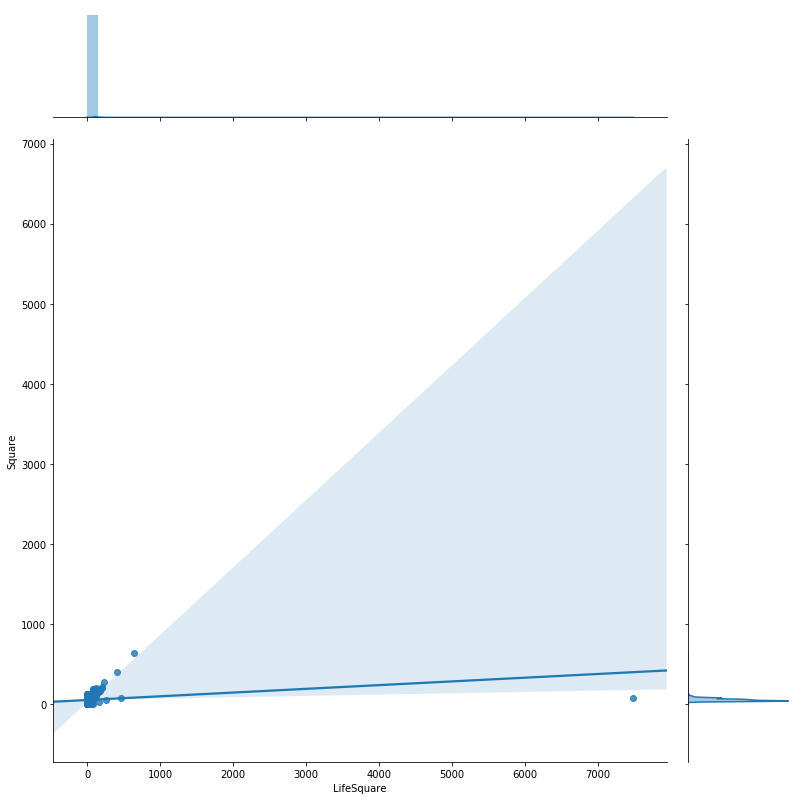

In [22]:
grid = sns.jointplot(df['LifeSquare'], df['Square'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

In [23]:
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['LifeSquare'].median()

In [24]:
df['LifeSquare'].isnull().sum()

0

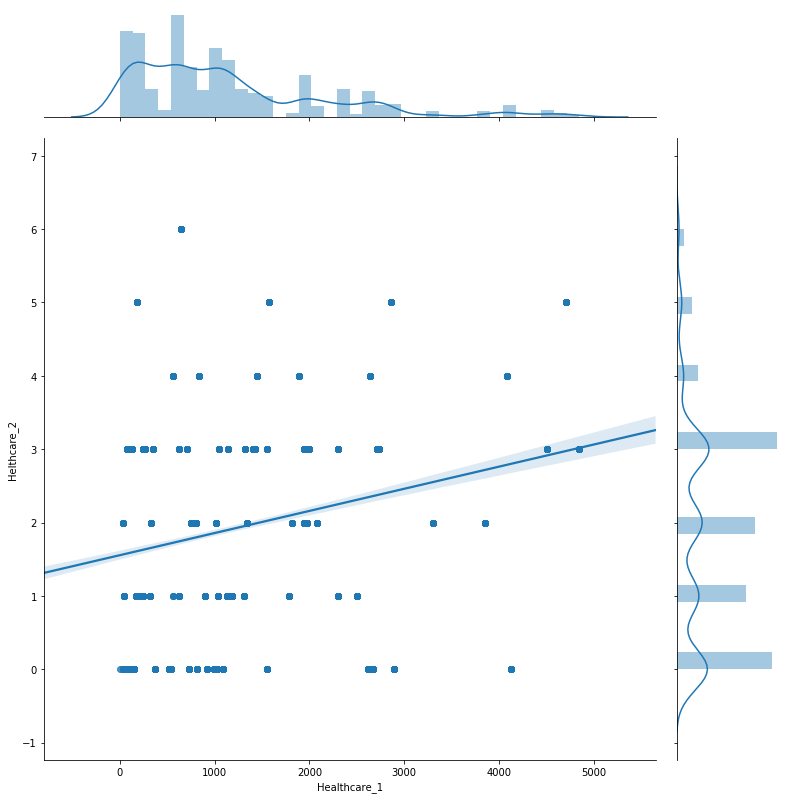

In [25]:
grid = sns.jointplot(df['Healthcare_1'], df['Helthcare_2'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

### Обработка выбросов

In [26]:
df[df['HouseYear'] > 2020]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1497  10814         109    1.0  37.265070   20.239714            9.0      9   
4189  11607         147    2.0  44.791836   28.360393            5.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1497        12.0   20052011   0.136330         B         B        30   
4189         9.0       4968   0.319809         B         B        25   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1497      6141        10         262.0            3        6       B   
4189      4756        16        2857.0            5        8       B   

              Price  
1497  254084.534396  
4189  243028.603096

In [27]:
df.loc[df['HouseYear'] > 2020, 'HouseYear'] = df['HouseYear'].median()

In [28]:
df[df['Rooms'] > 9]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
377    5927          57   10.0  59.056975   36.223072           10.0     22   
1454   8491           1   19.0  42.006046   21.779288            7.0     17   
8849  14865           9   10.0  60.871266   38.420681           10.0      3   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
377         22.0     2002.0   0.090799         B         B        74   
1454        17.0     2014.0   0.007122         B         B         1   
8849         2.0     1994.0   0.161532         B         B        25   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
377      19083         2           NaN            5       15       B   
1454       264         0           NaN            0        1       B   
8849      5648         1          30.0            2        4       B   

              Price  
377   317265.323792  
1454   78364.616704  
8849  172329.270863

In [29]:
df.loc[df['Rooms'] > 9, 'Rooms'] = df['Rooms'].median()

In [30]:
df[df['Square'] > 200]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1981   7917          27    0.0  212.932361  211.231125            0.0      2   
1982   5548          86    5.0  275.645284  233.949309           26.0     12   
4262     28           9    2.0  604.705972   32.781260            1.0     17   
4690   2307         102    1.0  409.425181  410.639749           10.0      4   
6977  11602          30    2.0  641.065193  638.163193           10.0     20   
9910  16568          27    4.0  200.334539  201.627361           25.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1981         3.0     2008.0   0.211401         B         B         9   
1982        37.0     2011.0   0.161976         B         A        31   
4262        18.0     1977.0   0.161532         B         B        25   
4690         4.0     2016.0   0.238617         B         B        26   
6977        19.0     2019.0   0.000078         B         B        22   
9910         2.0     2013.0   0.041116         B         B        53   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1981      1892         0           NaN            0        1       B   
1982      7010         5        4508.0            3        7       B   
4262      5648         1          30.0            2        4       B   
4690      3889         6         705.0            3        6       B   
6977      6398       141        1046.0            3       23       B   
9910     14892         4           NaN            1        4       B   

              Price  
1981  302211.260887  
1982  455264.882666  
4262  187717.242538  
4690   90470.430830  
6977  133529.681562  
9910  528560.506016

In [31]:
df.loc[df['Square'] > 200, 'Square'] = df['Square'].median()

In [32]:
df[df['LifeSquare'] > 200]

Id  DistrictId  Rooms     Square   LifeSquare  KitchenSquare  Floor  \
590   14990          23    2.0  48.449873   263.542020            5.0      6   
1981   7917          27    0.0  52.513310   211.231125            0.0      2   
1982   5548          86    5.0  52.513310   233.949309           26.0     12   
4328  16550          27    3.0  81.694417  7480.592129            1.0      9   
4690   2307         102    1.0  52.513310   410.639749           10.0      4   
6977  11602          30    2.0  52.513310   638.163193           10.0     20   
8437  15886          85    3.0  78.059331   461.463614           10.0     12   
9910  16568          27    4.0  52.513310   201.627361           25.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
590          5.0     1972.0   0.075779         B         B         6   
1981         3.0     2008.0   0.211401         B         B         9   
1982        37.0     2011.0   0.161976         B         A        31   
4328        17.0     2016.0   0.017647         B         B         2   
4690         4.0     2016.0   0.238617         B         B        26   
6977        19.0     2019.0   0.000078         B         B        22   
8437        16.0     1998.0   0.037178         B         B        52   
9910         2.0     2013.0   0.041116         B         B        53   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
590       1437         3           NaN            0        2       B   
1981      1892         0           NaN            0        1       B   
1982      7010         5        4508.0            3        7       B   
4328       469         0           NaN            0        0       B   
4690      3889         6         705.0            3        6       B   
6977      6398       141        1046.0            3       23       B   
8437     11217         1        2300.0            1        7       B   
9910     14892         4           NaN            1        4       B   

              Price  
590   141780.231857  
1981  302211.260887  
1982  455264.882666  
4328  217357.492366  
4690   90470.430830  
6977  133529.681562  
8437  394253.299978  
9910  528560.506016

In [33]:
df.loc[df['LifeSquare'] > 200, 'LifeSquare'] = df.loc[df['LifeSquare'] > 200, 'LifeSquare'] * 0.1

In [34]:
df.loc[df['LifeSquare'] > 200, 'LifeSquare'] = df.loc[df['LifeSquare'] > 200, 'LifeSquare'] * 0.1

In [35]:
df[df['LifeSquare'] > 200]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

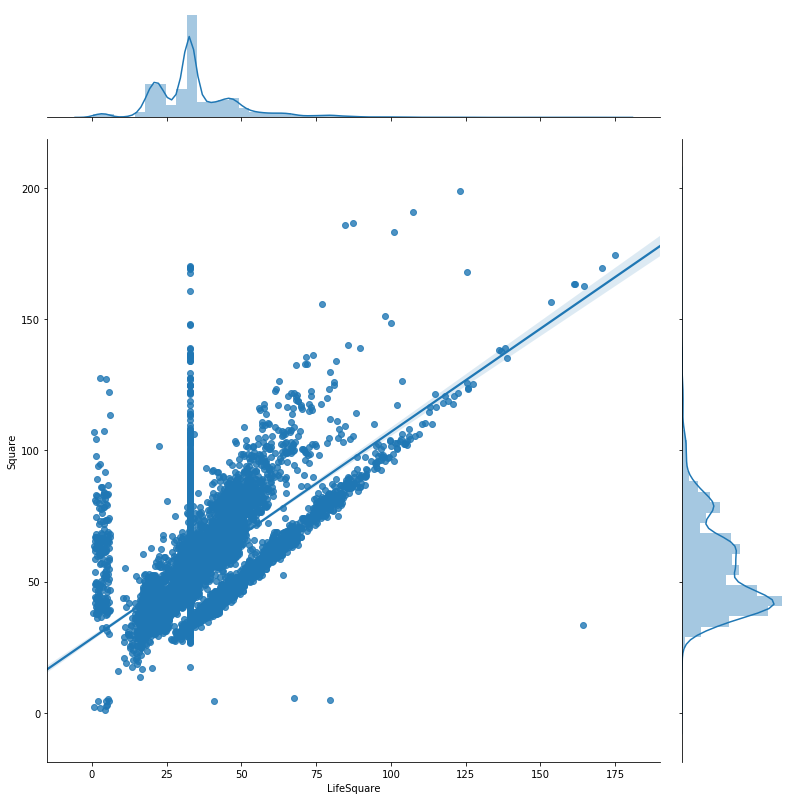

In [45]:
grid = sns.jointplot(df['LifeSquare'], df['Square'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

In [36]:
df[df['KitchenSquare'] > 50]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
227   16395           2    3.0   79.722243   44.731219           72.0     12   
1064  14656          62    1.0   47.100719   46.447960         2014.0      4   
1369   2371          27    2.0   68.841073   64.234956           66.0      4   
1455  12507          54    2.0   79.810535   79.578961           78.0     10   
1860   4265         161    2.0   53.216778   32.644859           53.0      7   
2916  12390          72    3.0   97.490674   99.323558           96.0     22   
2969   7441          62    3.0  114.734473  112.589083          112.0      3   
4079   6508          23    2.0   67.146049   33.959154           63.0      5   
4110    299          27    2.0   66.787523   64.616662           60.0     14   
4651  12552          58    3.0  116.405693  113.109653          112.0      3   
5149  13703          42    1.0   38.071692   19.723548           73.0      9   
5162  11739          27    2.0   61.070298   59.845092           58.0      8   
5888  16593          52    2.0   64.859242   32.781260           62.0     15   
5904    673          27    1.0   54.418214   51.498581           51.0     10   
6036  12666          34    2.0   60.603363    2.400832           58.0     14   
6240   4966          96    3.0   78.445675   47.146757           75.0      9   
7088   6569          27    1.0   38.220258   18.716856           84.0      4   
8232   7162          34    2.0   56.738764   57.510395           54.0     26   
8584  14679          81    1.0   32.276663   19.278394         1970.0      6   
9889  12918          23    2.0   51.440463   53.134243           51.0      3   
9895   2737          27    3.0  123.430072  125.806981          123.0      5   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
227         16.0     1987.0   0.130618         B         B        39   
1064         1.0     2014.0   0.072158         B         B         2   
1369         2.0     2014.0   0.017647         B         B         2   
1455        15.0     2014.0   0.006076         B         B        30   
1860        17.0     1994.0   0.000699         B         B        14   
2916        25.0     2019.0   0.210473         B         B        11   
2969         3.0     2015.0   0.072158         B         B         2   
4079        17.0     2019.0   0.034656         B         B         0   
4110        20.0     2015.0   0.017647         B         B         2   
4651         3.0     2016.0   0.437885         B         B        23   
5149        10.0     2006.0   0.158249         B         B        21   
5162        17.0     2016.0   0.072158         B         B         2   
5888        17.0     1977.0   0.371149         B         B        34   
5904        17.0     2017.0   0.072158         B         B         2   
6036        22.0     1977.0   0.069753         B         B        53   
6240        12.0     1977.0   0.041116         B         B        53   
7088        17.0     2018.0   0.011654         B         B         4   
8232        25.0     2016.0   0.069753         B         B        53   
8584         1.0     1977.0   0.006076         B         B        30   
9889        17.0     2017.0   0.005767         B         B         1   
9895        10.0     2015.0   0.017647         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
227      10418         9         900.0            1        9       B   
1064       629         1           NaN            0        0       A   
1369       469         0           NaN            0        0       B   
1455      5285         0         645.0            6        6       B   
1860      3369        24        4129.0            0        3       B   
2916      2398         2        1994.0            3        0       B   
2969       629         1           NaN            0        0       A   
4079       168         0           NaN            0        0       B   
4110       469 

In [37]:
df.loc[df['KitchenSquare'] > 40, 'KitchenSquare'] = df['KitchenSquare'].median()

In [38]:
df[df['KitchenSquare'] > 40]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

In [39]:
df[df['HouseFloor'] > 50]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
6131  10806           5    1.0  51.944587   48.709601            1.0      6   
8599   9300          74    2.0  71.747869   74.579809            9.0      5   
8854     78          30    2.0  65.773749   66.811789            1.0      8   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
6131        99.0     1977.0   0.150818         B         B        16   
8599        99.0     1977.0   0.075779         B         B         6   
8854       117.0     1977.0   0.000078         B         B        22   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
6131      3433         4        2643.0            4        5       B   
8599      1437         3           NaN            0        2       B   
8854      6398       141        1046.0            3       23       B   

              Price  
6131  296127.115515  
8599  243329.912579  
8854  207248.370520

In [40]:
df.loc[df['HouseFloor'] > 50, 'HouseFloor'] = df.loc[df['HouseFloor'] > 50, 'HouseFloor'] * 0.1

In [41]:
df.head(7)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   
5  12915          59    3.0  80.384479   46.683720           12.0      5   
6  14549         154    2.0  62.254114   37.160377            7.0      3   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0     1969.0   0.089040         B         B        33      7976   
1         9.0     1978.0   0.000070         B         B        46     10309   
2        12.0     1968.0   0.049637         B         B        34      7759   
3        17.0     1977.0   0.437885         B         B        23      5735   
4        12.0     1976.0   0.012339         B         B        35      5776   
5        17.0     2011.0   0.309479         B         B        35      7715   
6         5.0     1960.0   0.460556         B         B        20      4386   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644  
5         4         990.0            0        6       B  215898.447742  
6        14           NaN            1        5       B  296021.204377

### Анализ целевой переменной

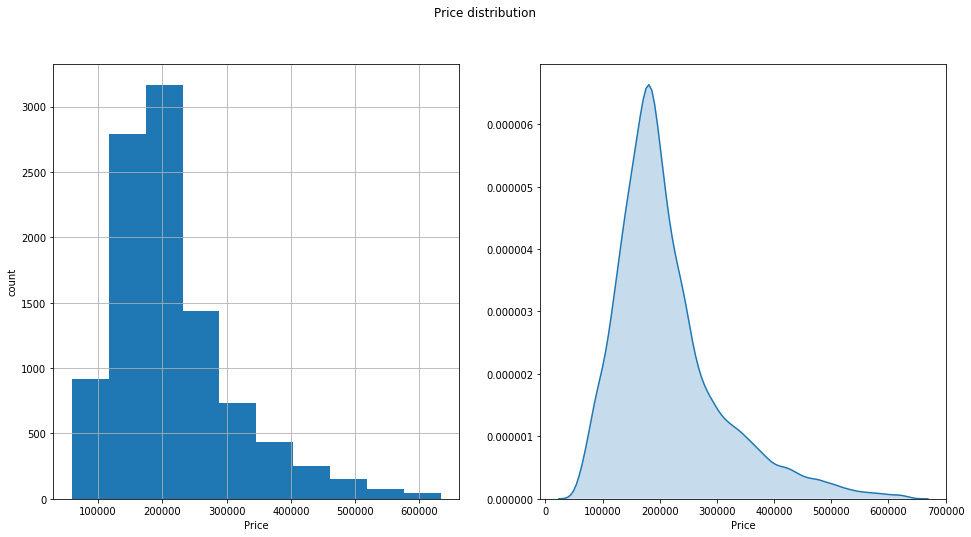

In [42]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist()
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Price distribution')
plt.show()

In [43]:
target_mean = round(df['Price'].mean(), 2)
target_median = round(df['Price'].median(), 2)
target_mode = round(df['Price'].mode()[0], 2)

target_mean, target_median, target_mode

(214138.86, 192269.64, 59174.78)

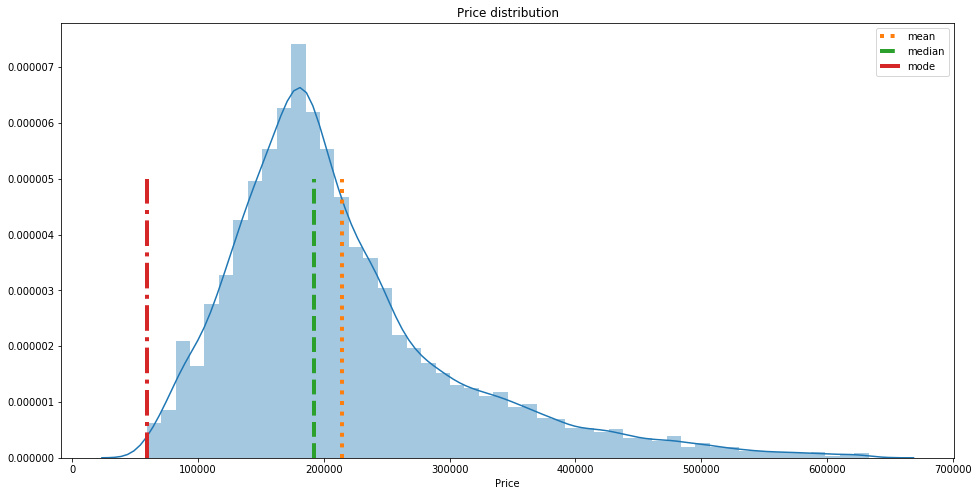

In [44]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Price'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Price distribution')
plt.legend()
plt.show()

In [176]:
# df['Price'].value_counts()

### Количественные признаки

In [181]:
df_num_features = df.select_dtypes(exclude=["object"])

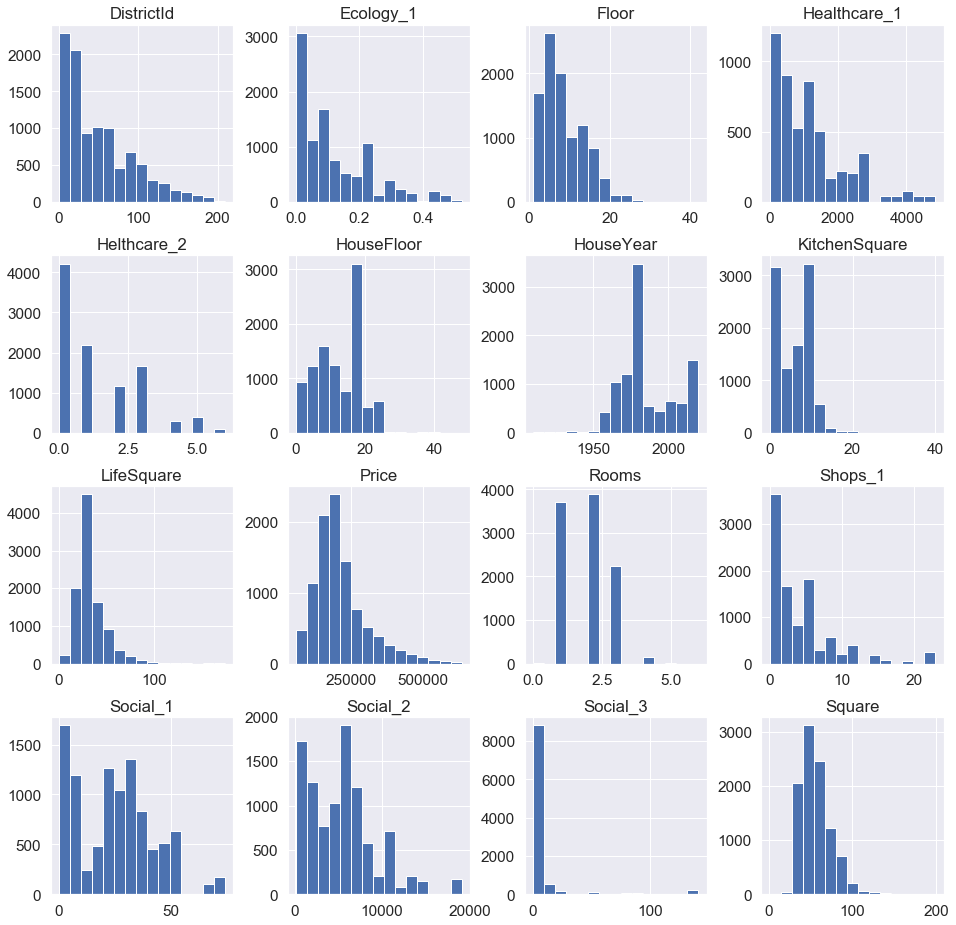

In [182]:
df_num_features.hist(figsize=(16,16), bins=15, grid=True);

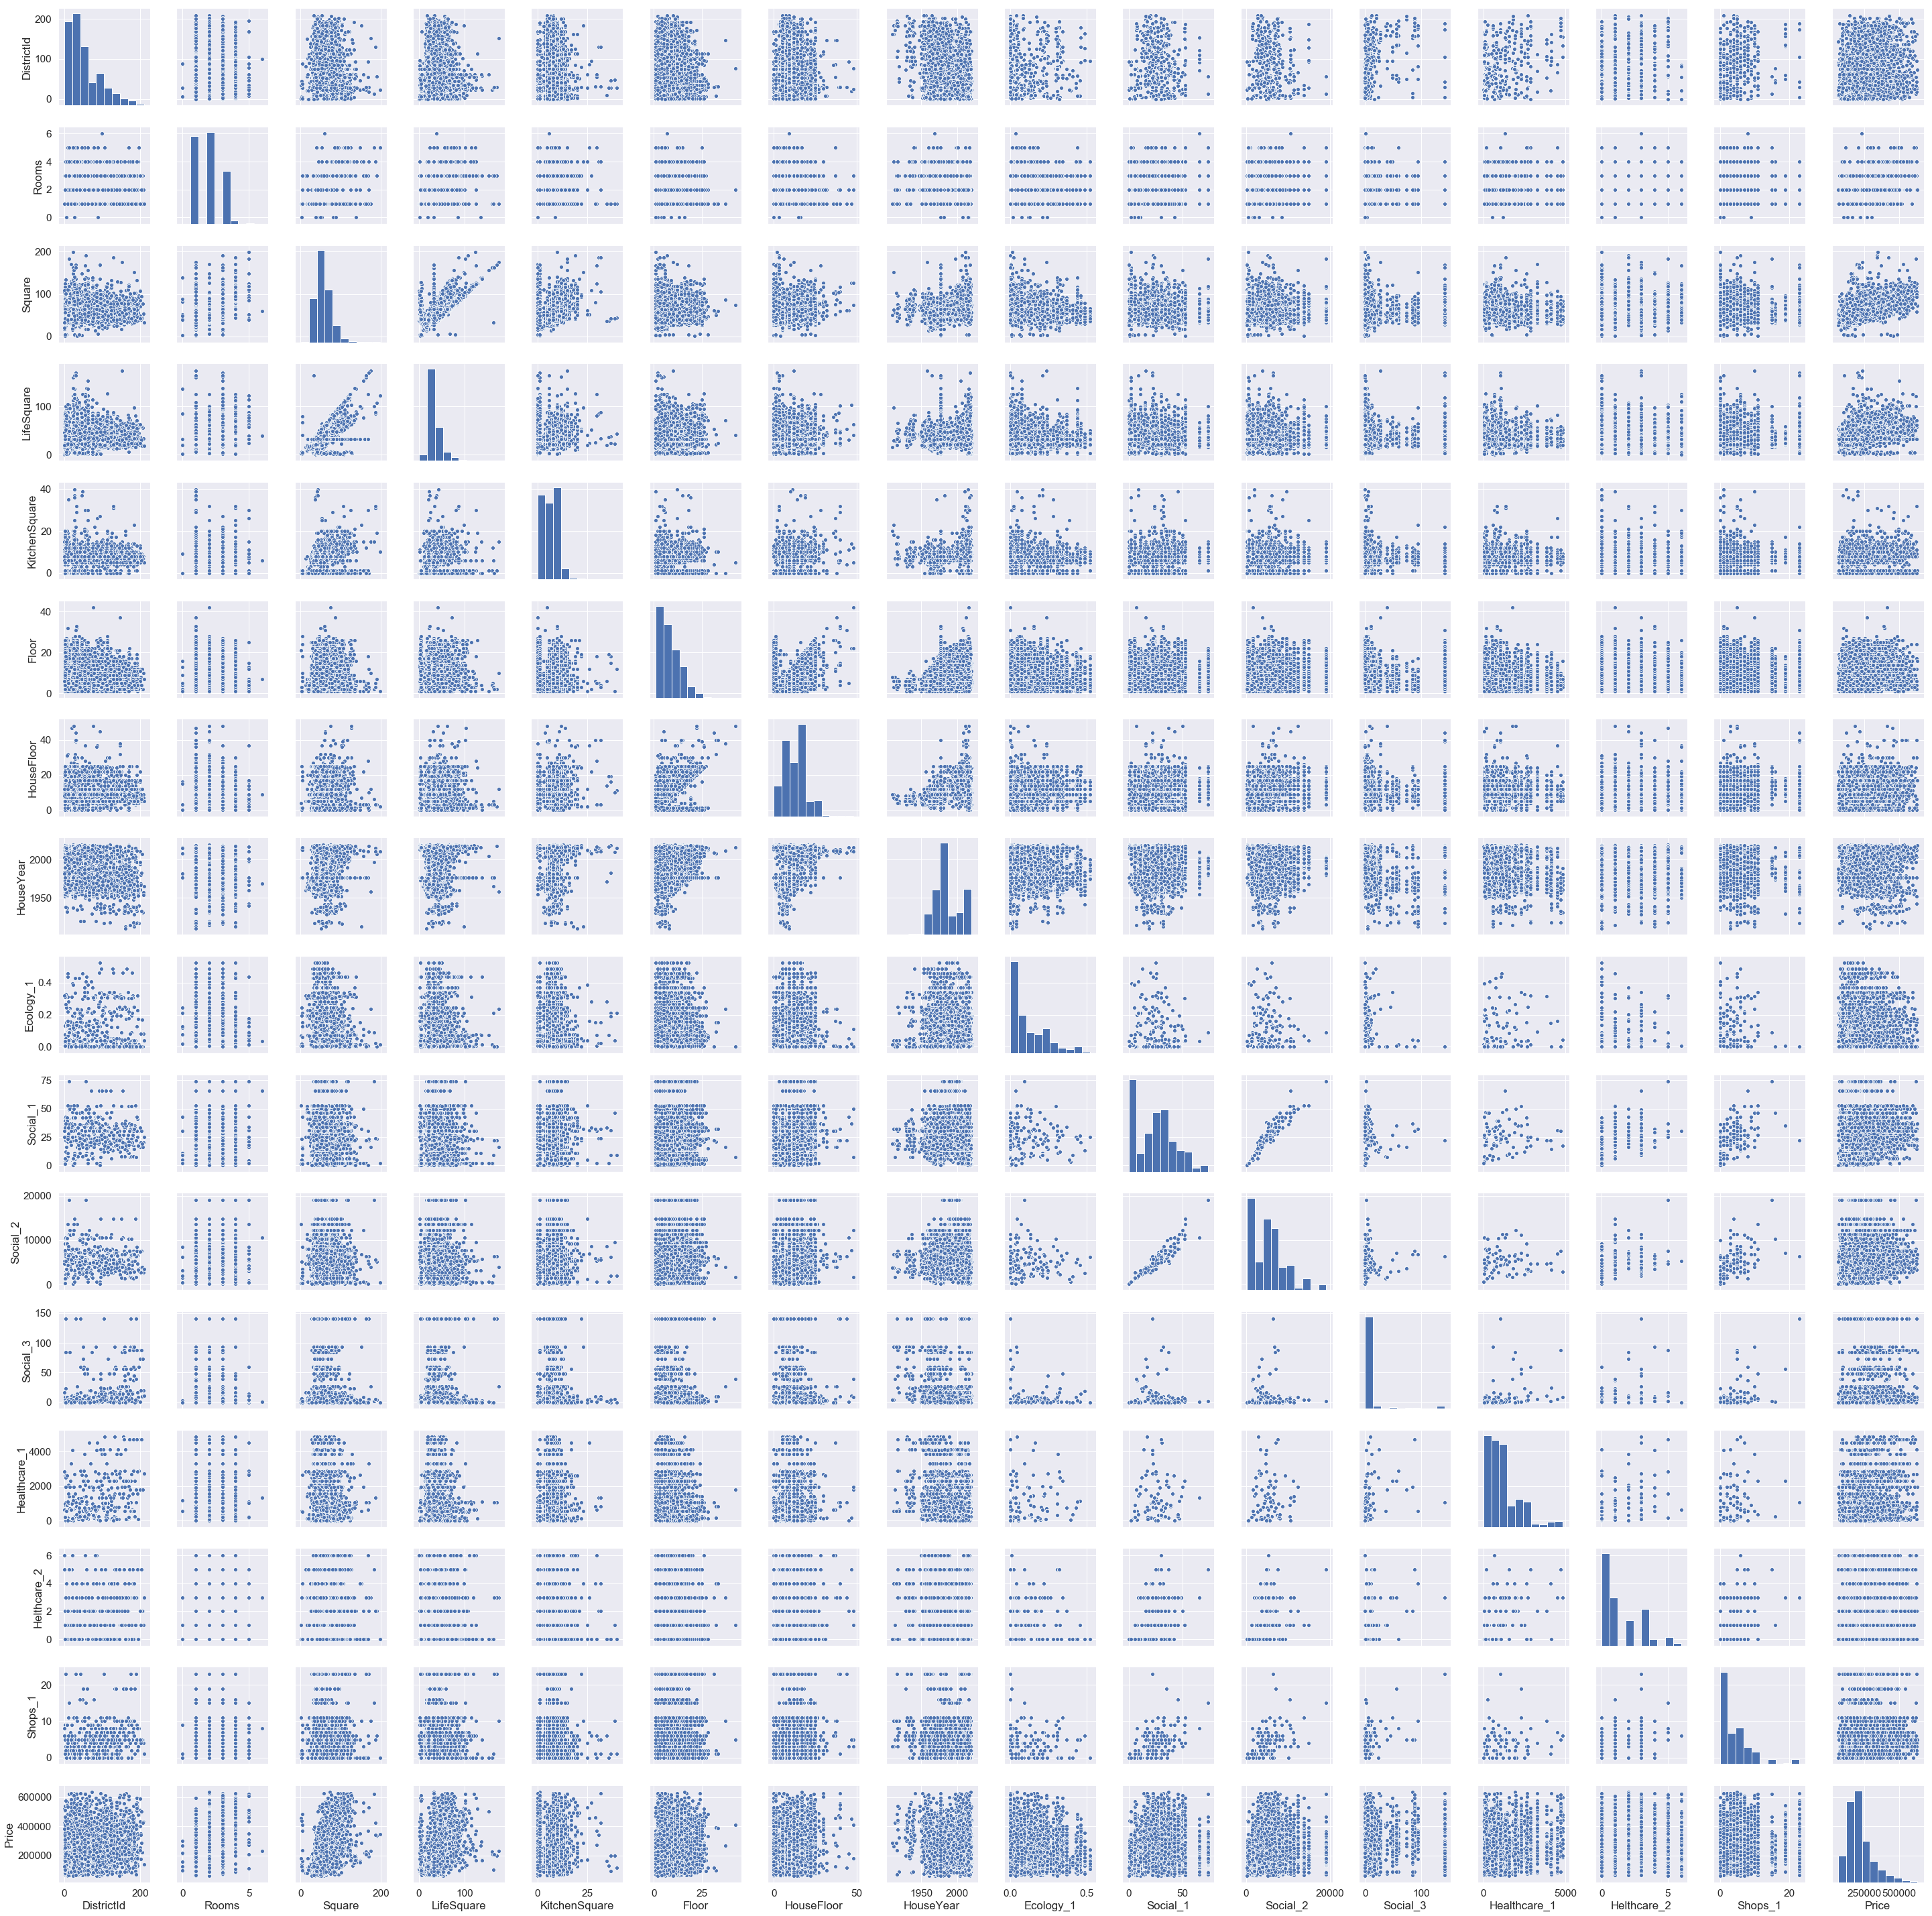

In [183]:
sns.pairplot(df_num_features);

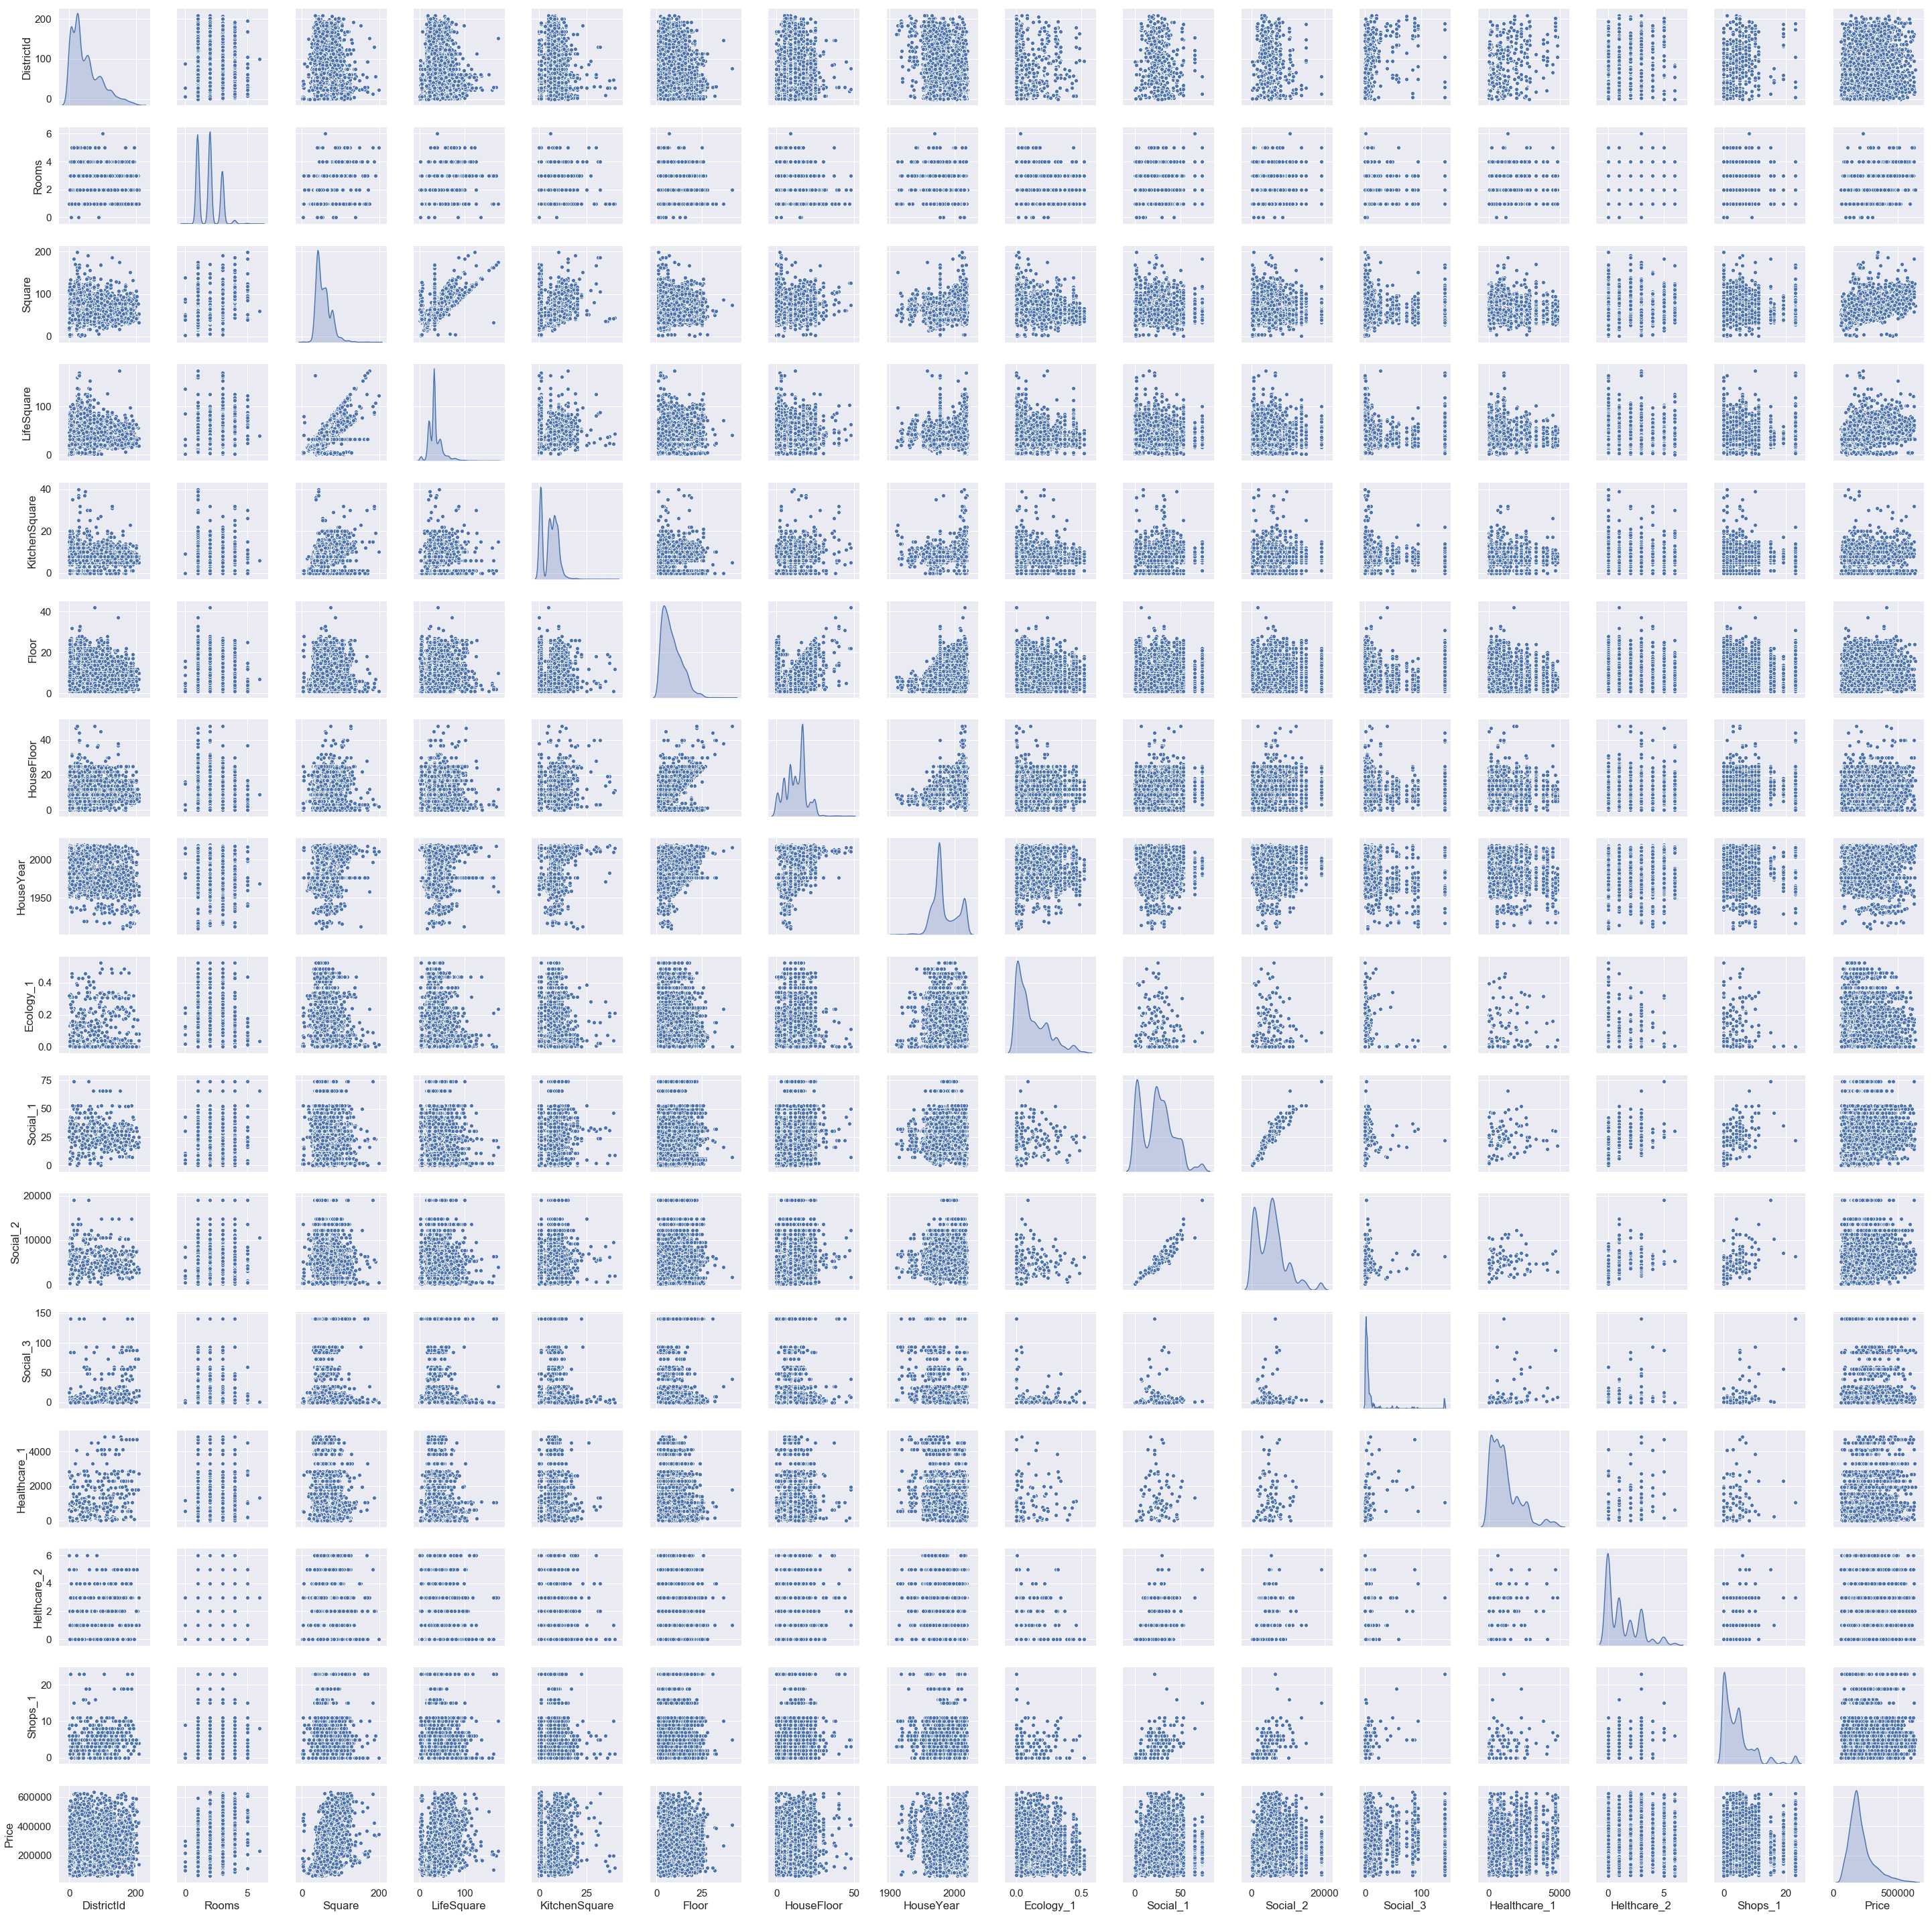

In [184]:
sns.pairplot(df_num_features, diag_kind="kde");

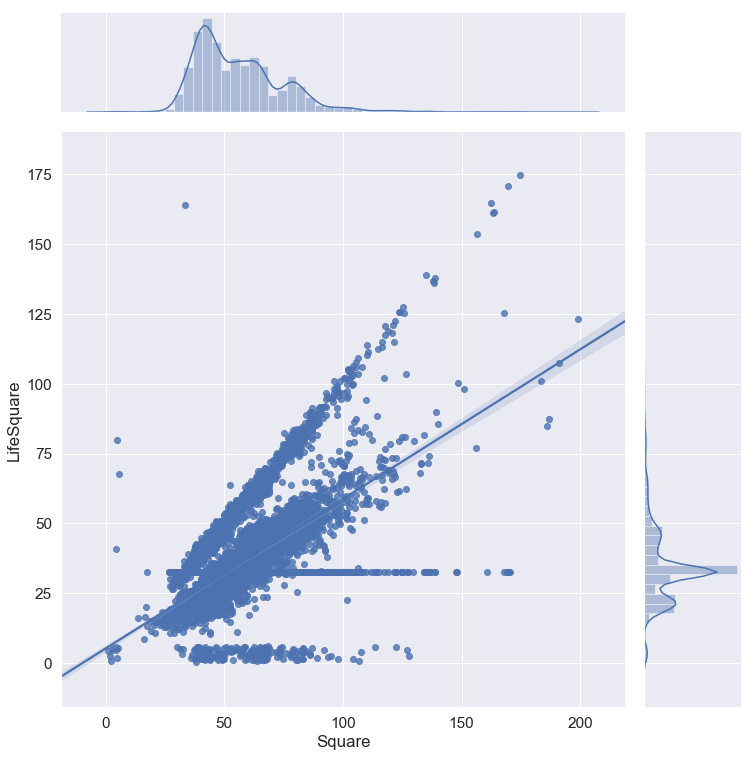

In [177]:
grid = sns.jointplot(df['Square'], df['LifeSquare'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

### Матрица корреляций

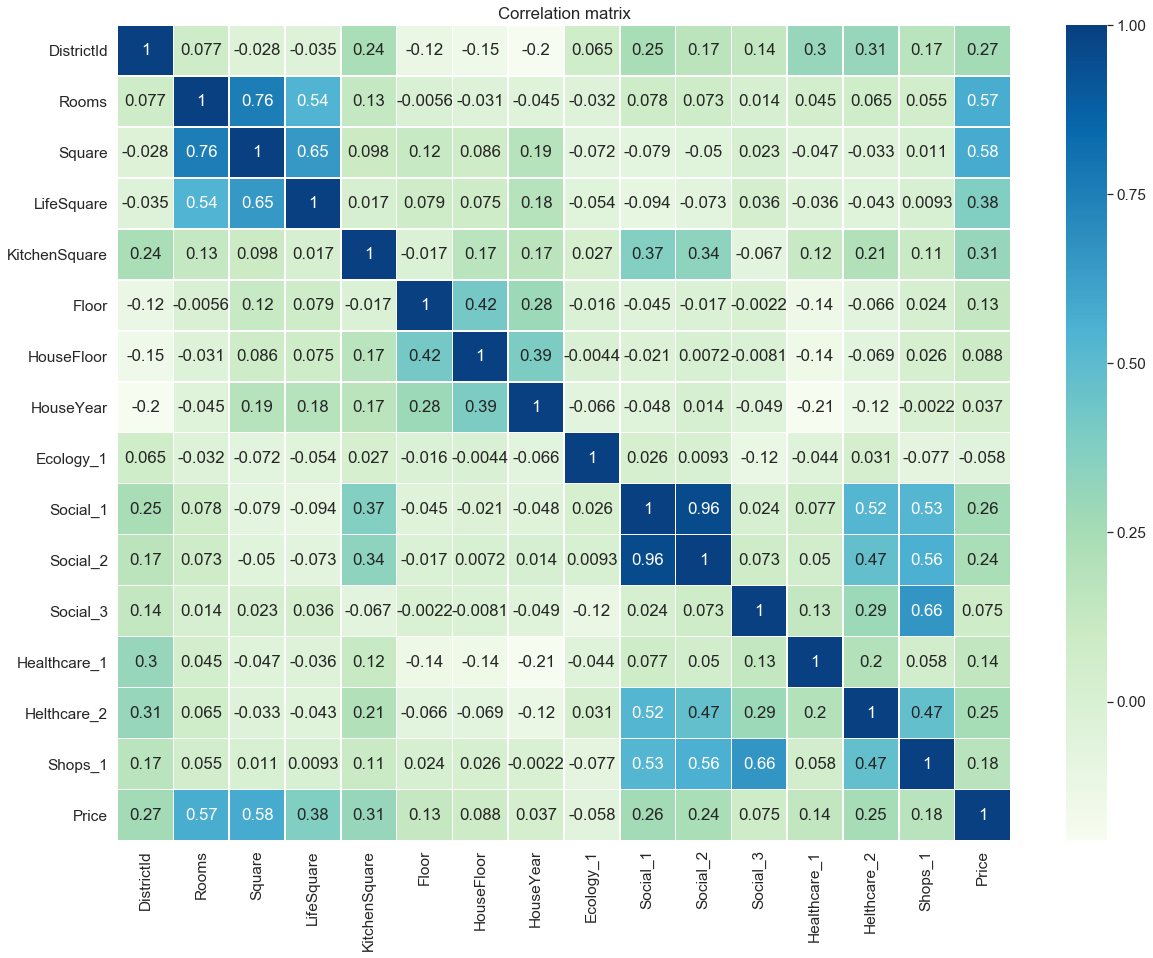

In [175]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### Преобразование категориальных признаков в бинарные

In [46]:
pd.get_dummies(df['Ecology_2'])

A  B
0     0  1
1     0  1
2     0  1
3     0  1
4     0  1
5     0  1
6     0  1
7     0  1
8     0  1
9     0  1
10    0  1
11    0  1
12    0  1
13    0  1
14    0  1
15    0  1
16    0  1
17    0  1
18    0  1
19    0  1
20    0  1
21    0  1
22    0  1
23    0  1
24    0  1
25    0  1
26    0  1
27    0  1
28    0  1
29    0  1
...  .. ..
9970  0  1
9971  0  1
9972  0  1
9973  0  1
9974  0  1
9975  0  1
9976  0  1
9977  0  1
9978  0  1
9979  0  1
9980  0  1
9981  0  1
9982  0  1
9983  0  1
9984  0  1
9985  0  1
9986  0  1
9987  0  1
9988  0  1
9989  0  1
9990  0  1
9991  0  1
9992  0  1
9993  0  1
9994  0  1
9995  0  1
9996  0  1
9997  0  1
9998  0  1
9999  0  1

[10000 rows x 2 columns]

In [47]:
pd.get_dummies(df['Ecology_3'])

A  B
0     0  1
1     0  1
2     0  1
3     0  1
4     0  1
5     0  1
6     0  1
7     0  1
8     0  1
9     0  1
10    0  1
11    0  1
12    0  1
13    0  1
14    0  1
15    0  1
16    0  1
17    0  1
18    0  1
19    0  1
20    0  1
21    0  1
22    0  1
23    0  1
24    0  1
25    0  1
26    0  1
27    0  1
28    0  1
29    0  1
...  .. ..
9970  0  1
9971  0  1
9972  0  1
9973  0  1
9974  0  1
9975  0  1
9976  0  1
9977  0  1
9978  0  1
9979  0  1
9980  0  1
9981  0  1
9982  0  1
9983  0  1
9984  0  1
9985  0  1
9986  0  1
9987  0  1
9988  0  1
9989  0  1
9990  0  1
9991  0  1
9992  0  1
9993  0  1
9994  0  1
9995  0  1
9996  0  1
9997  0  1
9998  1  0
9999  0  1

[10000 rows x 2 columns]

In [48]:
pd.get_dummies(df['Shops_2'])

A  B
0     0  1
1     0  1
2     0  1
3     0  1
4     0  1
5     0  1
6     0  1
7     0  1
8     0  1
9     0  1
10    0  1
11    0  1
12    0  1
13    1  0
14    1  0
15    0  1
16    0  1
17    0  1
18    1  0
19    0  1
20    0  1
21    0  1
22    0  1
23    0  1
24    0  1
25    0  1
26    1  0
27    0  1
28    0  1
29    0  1
...  .. ..
9970  0  1
9971  1  0
9972  0  1
9973  0  1
9974  0  1
9975  1  0
9976  0  1
9977  0  1
9978  0  1
9979  0  1
9980  0  1
9981  0  1
9982  0  1
9983  0  1
9984  0  1
9985  0  1
9986  0  1
9987  0  1
9988  0  1
9989  0  1
9990  0  1
9991  0  1
9992  0  1
9993  0  1
9994  0  1
9995  0  1
9996  1  0
9997  1  0
9998  0  1
9999  0  1

[10000 rows x 2 columns]

In [50]:
df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
df.head(n=5)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 ... Social_1 Social_2  Social_3  \
0         9.0     1969.0   0.089040 ...       33     7976         5   
1         9.0     1978.0   0.000070 ...       46    10309         1   
2        12.0     1968.0   0.049637 ...       34     7759         0   
3        17.0     1977.0   0.437885 ...       23     5735         3   
4        12.0     1976.0   0.012339 ...       35     5776         1   

   Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  A  B  
0           NaN            0       11        B  184966.930730  0  1  
1         240.0            1       16        B  300009.450063  0  1  
2         229.0            1        3        B  220925.908524  0  1  
3        1084.0            0        5        B  175616.227217  0  1  
4        2078.0            2        4        B  150226.531644  0  1  

[5 rows x 22 columns]

In [51]:
df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis=1)
df.head(n=5)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 ... Social_3 Healthcare_1  Helthcare_2  \
0         9.0     1969.0   0.089040 ...        5          NaN            0   
1         9.0     1978.0   0.000070 ...        1        240.0            1   
2        12.0     1968.0   0.049637 ...        0        229.0            1   
3        17.0     1977.0   0.437885 ...        3       1084.0            0   
4        12.0     1976.0   0.012339 ...        1       2078.0            2   

   Shops_1  Shops_2          Price  A  B  A  B  
0       11        B  184966.930730  0  1  0  1  
1       16        B  300009.450063  0  1  0  1  
2        3        B  220925.908524  0  1  0  1  
3        5        B  175616.227217  0  1  0  1  
4        4        B  150226.531644  0  1  0  1  

[5 rows x 24 columns]

In [52]:
df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)
df.head(n=5)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 ... Helthcare_2 Shops_1  Shops_2  \
0         9.0     1969.0   0.089040 ...           0      11        B   
1         9.0     1978.0   0.000070 ...           1      16        B   
2        12.0     1968.0   0.049637 ...           1       3        B   
3        17.0     1977.0   0.437885 ...           0       5        B   
4        12.0     1976.0   0.012339 ...           2       4        B   

           Price  A  B  A  B  A  B  
0  184966.930730  0  1  0  1  0  1  
1  300009.450063  0  1  0  1  0  1  
2  220925.908524  0  1  0  1  0  1  
3  175616.227217  0  1  0  1  0  1  
4  150226.531644  0  1  0  1  0  1  

[5 rows x 26 columns]

In [53]:
df.tail(n=5)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
9995    77          32    2.0  50.401785   30.476203            5.0      6   
9996  6159          18    1.0  41.521546   20.539216            9.0     13   
9997  5123          27    1.0  47.939008   32.781260            1.0     12   
9998  5400          75    2.0  43.602562   33.840147            8.0      1   
9999  6306         128    1.0  38.666645   21.157874            8.0      7   

      HouseFloor  HouseYear  Ecology_1 ... Helthcare_2 Shops_1  Shops_2  \
9995         5.0     1968.0   0.135650 ...           3      11        B   
9996        13.0     2000.0   0.000000 ...           0       5        A   
9997        16.0     2015.0   0.072158 ...           0       0        A   
9998         5.0     1961.0   0.307467 ...           2       5        B   
9999        17.0     1990.0   0.000000 ...           2       8        B   

              Price  A  B  A  B  A  B  
9995  196684.316040  0  1  0  1  0  1  
9996  189050.289571  0  1  0  1  1  0  
9997  159143.805370  0  1  0  1  1  0  
9998  181595.339808  0  1  1  0  0  1  
9999  218714.077615  0  1  0  1  0  1  

[5 rows x 26 columns]